# K Nearest Neighbours

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../1-RawData/breast_cancer_selected.csv")
df.head()

,concave_points_worst,perimeter_worst,concave_points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,diagnosis
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40,1
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08,1
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03,1
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23,1
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44,1


In [3]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101 )

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
knn_grid_model = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1, verbose=1)
knn_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [13]:
knn_grid_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

### Performance Metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
y_pred = knn_grid_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.89      0.86      0.88        66

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



C:\Users\CVR\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


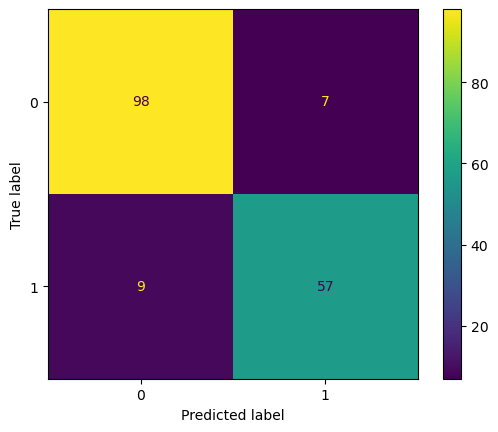

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()

### Exporting the model

In [17]:
import joblib

In [18]:
joblib.dump(knn_grid_model, '../4-TrainedModels/knn_model.pkl')

['../4-TrainedModels/knn_model.pkl']